# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the Dataset
df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Exploring the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Chekcing any null values
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
# Removing the unnecessary columns
df.drop(['CustomerID'], axis=1, inplace=True)
df.drop(['Gender'], axis=1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


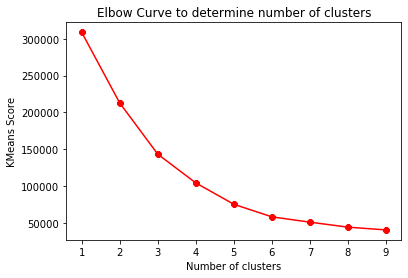

In [7]:
# Determining K Value using Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss, color="red", marker ="8")
plt.title("Elbow Curve to determine number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("KMeans Score")
plt.show()

In [8]:
# K value is choosen as 5
# Scaling the Data
k = 5
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
X_scaled = sc.transform(df)

In [9]:
# Model Implementation
model = KMeans(n_clusters = k)
model.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# Prediction
predicted = model.predict(X_scaled)

In [11]:
# Model Evaluation
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled,predicted)
print("Score is :", score)

Score is : 0.41664341513732767


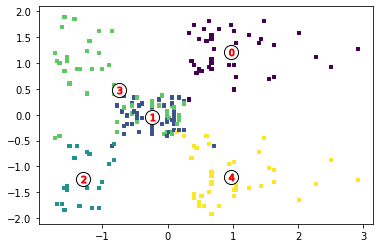

In [12]:
# Model Visualization

fig = plt.figure()
ax1 = fig.add_subplot(111)
centroids = model.cluster_centers_
ax1.scatter(X_scaled.T[1],X_scaled.T[2], s=10, c=predicted, marker="s")
ax1.scatter(centroids[:, 1], centroids[:, 2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax1.scatter(c[1], c[2], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
plt.show()